### Notebook 01: Exploratory Data Analysis

This notebook includes the exploratory data analysis of the EA ModelSet.

In [1]:
# Librairies
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to EA model set directory
ea_modelset_dir = os.path.join("..", "Data", "ea_modelset", "eamodelset", "dataset")

# Path to EA model set JSON file
ea_modelset_file = os.path.join(ea_modelset_dir, "dataset.json")

# Load EA model set JSON data
with open(ea_modelset_file, "r") as file:
    ea_modelset_data = json.load(file)

# Show keys of the EA model set data
ea_modelset_data.keys()


dict_keys(['title', 'version', 'lastUpdated', 'repositoryUrl', 'homepageUrl', 'distribution', 'modelCount', 'modelInfos'])

#### The dataset (dataset.json) is loaded and keys reviewed. Architecture model metadata is stored in modelInfos. 

In [3]:
# Extract models information
models_info = ea_modelset_data.get("modelInfos", [])

# Print number of models
print(f"Number of models in EA model set: {len(models_info)}")

# Convert models information to DataFrame
models_df = pd.DataFrame(models_info)

# Print shape of the DataFrame
print(f"Shape of models DataFrame: {models_df.shape}")

Number of models in EA model set: 978
Shape of models DataFrame: (978, 12)


#### Metedata is extracted from modelInfos and converted to pandas DataFrame for analysis. Dataset contains 978 records (architectural models) with 12 features.

In [4]:
# Print info about the DataFrame
models_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 978 non-null    object
 1   name               978 non-null    object
 2   source             978 non-null    object
 3   repository         978 non-null    object
 4   license            978 non-null    object
 5   language           978 non-null    object
 6   formats            978 non-null    object
 7   tags               978 non-null    object
 8   duplicateCount     978 non-null    int64 
 9   elementCount       978 non-null    int64 
 10  relationshipCount  978 non-null    int64 
 11  viewCount          978 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 91.8+ KB


In [5]:
# Check for missing values in each column
models_df.isnull().sum()

id                   0
name                 0
source               0
repository           0
license              0
language             0
formats              0
tags                 0
duplicateCount       0
elementCount         0
relationshipCount    0
viewCount            0
dtype: int64

In [6]:
# Display first few rows of the DataFrame
models_df.head()

,id,name,source,repository,license,language,formats,tags,duplicateCount,elementCount,relationshipCount,viewCount
0,id-48fb3807bfa249a9bae607b6a92cc390,LAE,GitHub,,,fr,"[XML, CSV, JSON, ARCHIMATE]",[],0,142,296,24
1,4cc127d7-6937-42e8-99fb-19f0f6f4991a,Baseline Media Production,GitHub,gattardm/P8,Unspecified,fr,"[ARCHIMATE, XML, CSV, JSON]",[],0,22,28,1
2,_7RWQ8CqVEey-A40W5C_9dw,buhService,GenMyModel,,,ru,"[XML, CSV, JSON, ARCHIMATE]",[],0,55,41,3
3,3846c562-eab4-4e07-aa95-87703e0e0e69,Data model test,GenMyModel,,,en,"[XML, JSON]",[],0,15,11,1
4,_ay028PGjEeqygJczXaaxEQ,payments-arch,GenMyModel,,,en,"[XML, CSV, JSON, ARCHIMATE]",[],0,18,20,1


#### No missing values found in the dataset. Dataset contains categorical and numerical features.

In [7]:
# Describe the DataFrame
models_df.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
duplicateCount,978.0,0.247444,0.850142,0.0,0.00,0.0,0.00,10.0
elementCount,978.0,106.566462,252.282494,10.0,23.00,50.0,102.75,4003.0
relationshipCount,978.0,139.639059,392.926723,0.0,23.25,57.0,119.00,5773.0
viewCount,978.0,7.310838,22.859714,0.0,1.00,2.0,5.00,357.0


In [8]:
# Display info about the categorical columns
categorical_columns = ["source", "license", "language", "formats", "tags"]
for col in categorical_columns:
    print(f"Value counts for column '{col}':")
    print(models_df[col].value_counts())
    print("\n")


Value counts for column 'source':
source
GitHub        671
GenMyModel    273
Other          32
Unknown         2
Name: count, dtype: int64


Value counts for column 'license':
license
                                               452
Not found                                      169
Other                                          145
Unspecified                                     50
MIT                                             45
MIT License                                     31
Apache License 2.0                              27
GNU General Public License v3.0                 16
CC0-1.0                                          8
WTFPL                                            7
GPL 3.0                                          5
Creative Commons Zero v1.0 Universal             4
GPL-3.0                                          3
GNU General Public License v2.0                  2
CC-BY-4.0                                        2
Do What The F*ck You Want To Public License      2


#### Numerical and categorical features examined further with visualizations for numerical features.


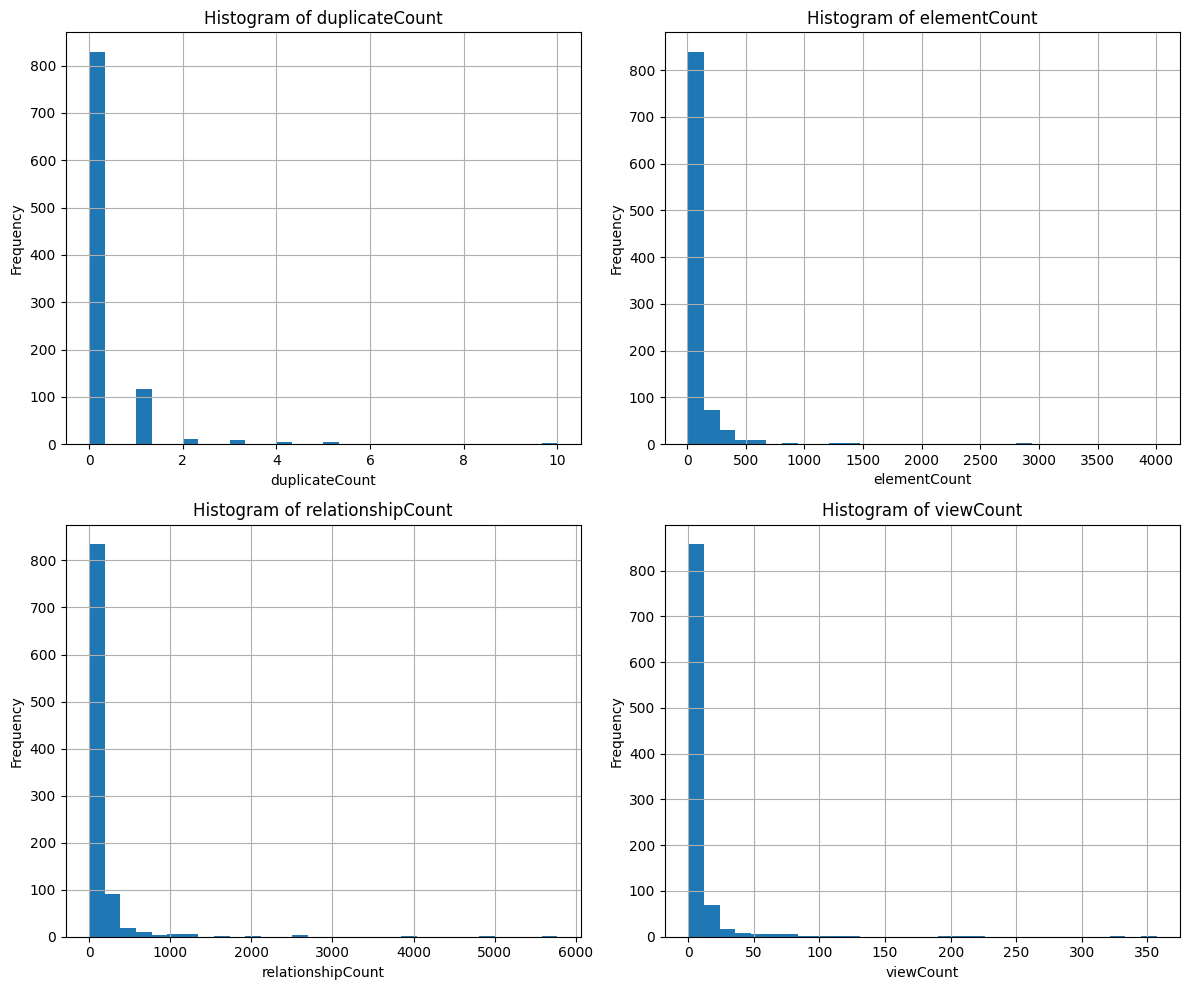

In [9]:
# Histograms for numerical columns in a 2x2 table
numerical_columns = ["duplicateCount", "elementCount", "relationshipCount", "viewCount"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, col in zip(axes.flatten(), numerical_columns):
    models_df[col].hist(ax=ax, bins=30)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")  
plt.tight_layout()
plt.show()

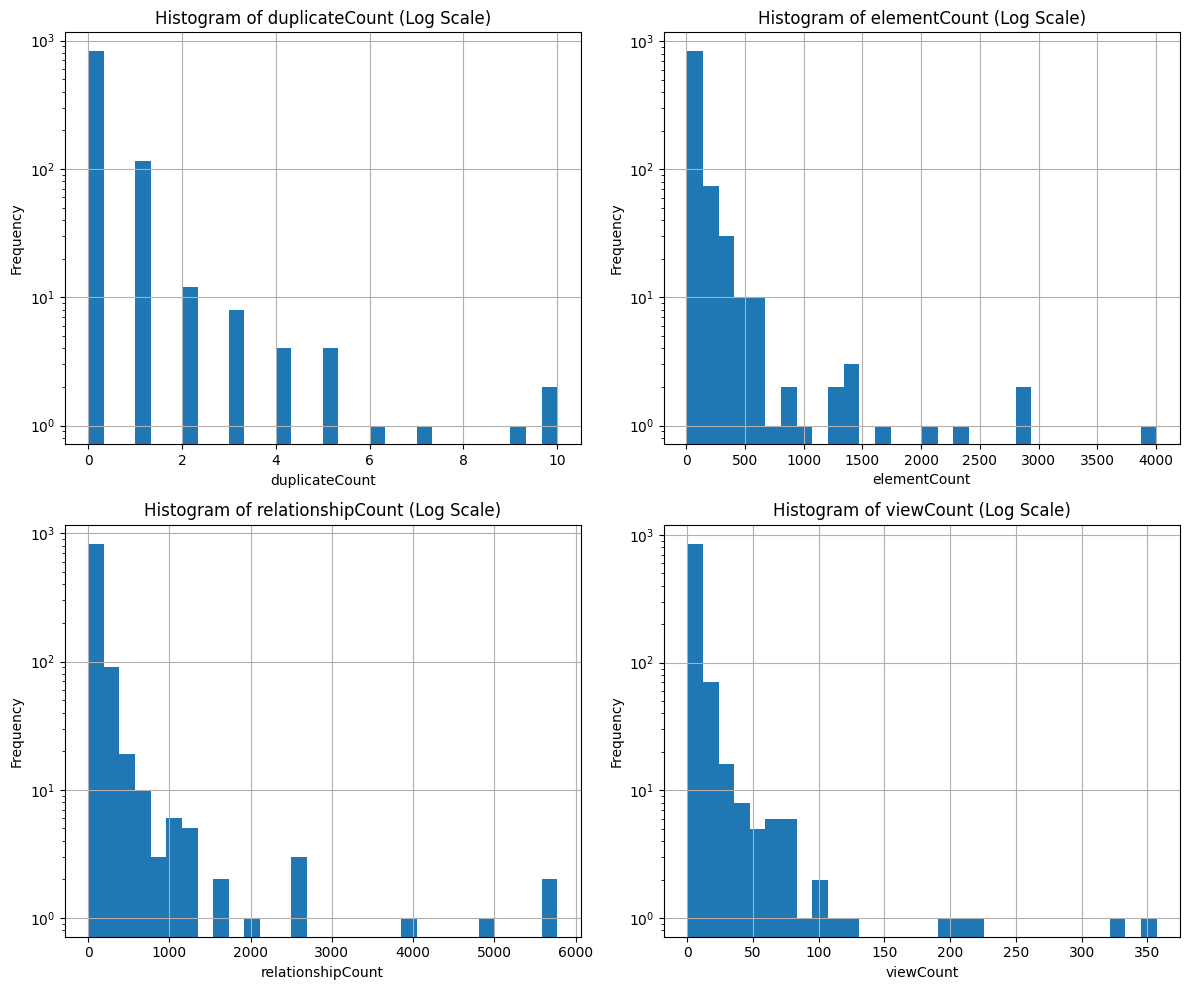

In [10]:
# Log scale histogram for nuerical columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, col in zip(axes.flatten(), numerical_columns):
    models_df[col].hist(ax=ax, bins=30, log=True)
    ax.set_title(f"Histogram of {col} (Log Scale)")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

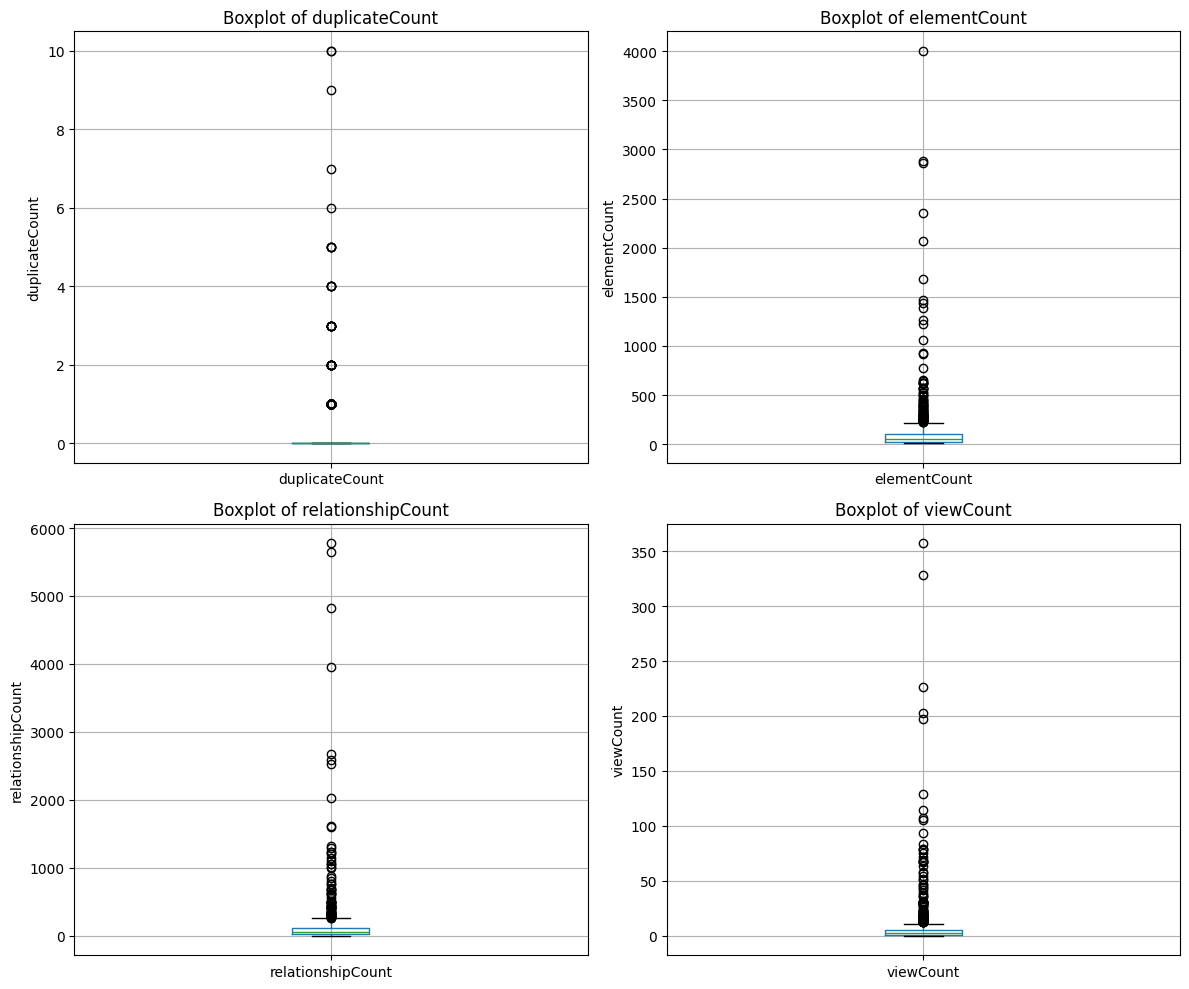

In [11]:
# Boxplots for numerical columns in a 2x2 table
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, col in zip(axes.flatten(), numerical_columns):
    models_df.boxplot(column=col, ax=ax)
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)
plt.tight_layout()
plt.show()

Outliers in numerical columns can be observed from the boxplots, especially in 'elementCount' and 'relationshipCount', but this is expected for the statistics for the architecture models, as a few will have greater complexity. 

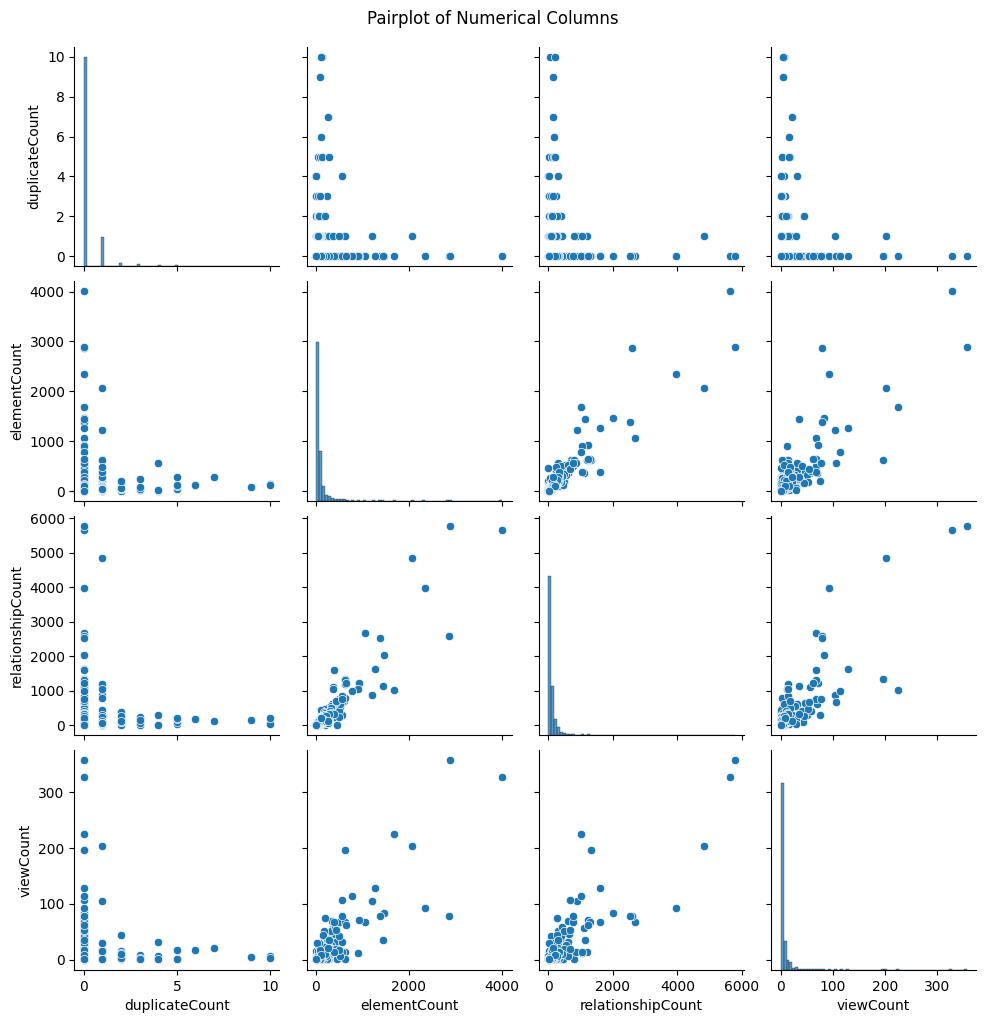

In [12]:
# Pairplot of nurmerical columns
sns.pairplot(models_df[numerical_columns])
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()


Pair plot shows that tre strong positive correlation between 'elementCount' and 'relationshipCount', indicating that models with more elements tend to have more relationships. Other numerical features show weaker correlations.  

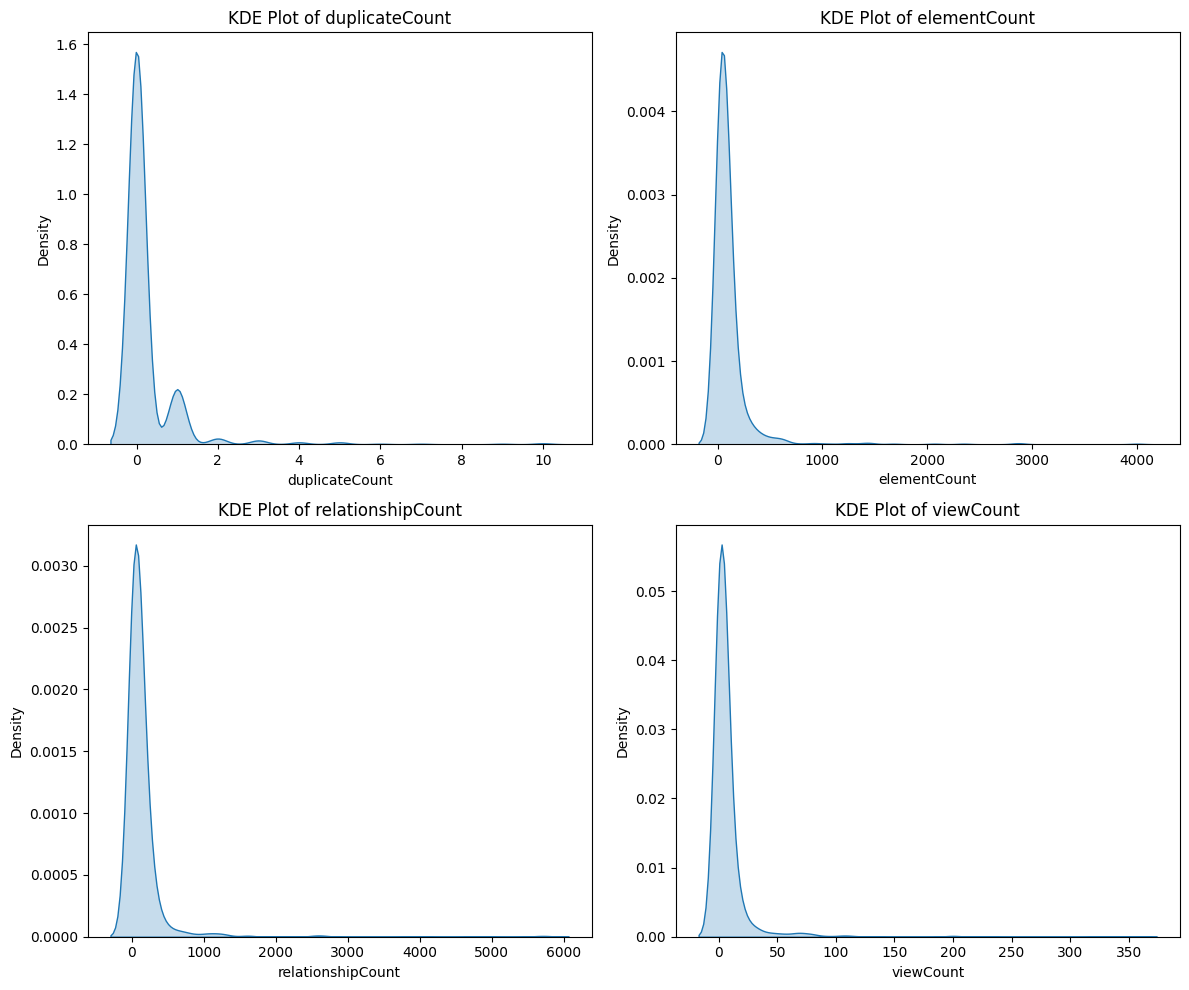

In [13]:
# KDE plots for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, col in zip(axes.flatten(), numerical_columns):
    sns.kdeplot(models_df[col], ax=ax, fill=True)
    ax.set_title(f"KDE Plot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
plt.tight_layout()
plt.show()


KDE plots for numerical columns show that the distributions are right-skewed, with a long tail towards higher values. This indicates that while most models have lower counts for these features, there are a few models with significantly higher counts, contributing to the skewness.

Correlation matrix for numerical columns:
                   duplicateCount  elementCount  relationshipCount  viewCount
duplicateCount           1.000000      0.009076          -0.001246   0.004044
elementCount             0.009076      1.000000           0.933490   0.845683
relationshipCount       -0.001246      0.933490           1.000000   0.855846
viewCount                0.004044      0.845683           0.855846   1.000000


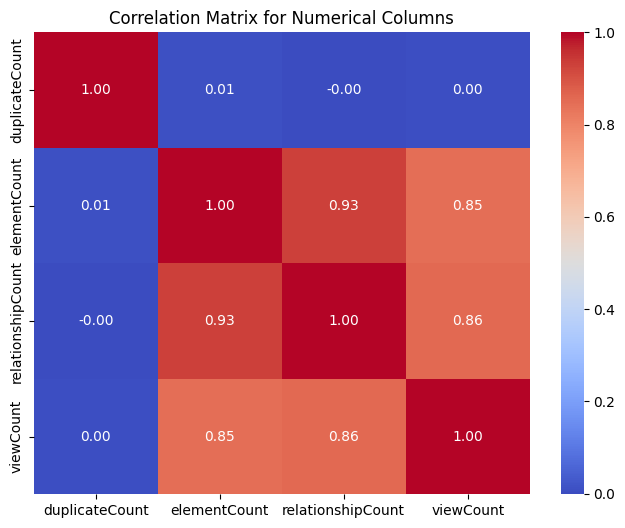

In [14]:
# Correlation matrix for numerical columns
correlation_matrix = models_df[numerical_columns].corr()
print("Correlation matrix for numerical columns:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Columns")
plt.show()



The correlation matrix shows a strong positive correlation (0.93) between 'elementCount' and 'relationshipCount', indicating that models with more elements tend to have more relationships. 'viewCount' has a relatively high correlation with 'elementCount' and 'relationshipCount' also. These features are all related to model complexity. 